##Data Loading

In [1]:
import pandas as pd
data_test = 'https://raw.githubusercontent.com/aryan-bu/BA820/main/drug_reviews_dataset/drugsComTest_raw.tsv'
data_train = 'https://raw.githubusercontent.com/aryan-bu/BA820/main/drug_reviews_dataset/drugsComTrain_raw.tsv'

df_test = pd.read_csv(data_test, delimiter='\t')
df_train = pd.read_csv(data_train, delimiter='\t')

In [2]:
df_test.head()

Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   

                 date  usefulCount  
0   February 28, 2012           22  
1        May 17, 2009           17  
2  September 29, 2017            3  
3       March 5, 2017           35  
4    October 22, 2015            4

In [3]:
df_train.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [4]:
df_test.shape

(53766, 7)

In [5]:
df_train.shape

(161297, 7)

In [6]:
df = pd.concat([df_test, df_train])
df.shape

(215063, 7)

In [7]:
df = df.rename(columns={'Unnamed: 0': 'index'})
df = df.sort_values(by='index', ascending=True)
df.head()

index             drugName                  condition  \
47805       0  Medroxyprogesterone  Abnormal Uterine Bleeding   
93135       2  Medroxyprogesterone                 Amenorrhea   
143331      3  Medroxyprogesterone  Abnormal Uterine Bleeding   
57030       4  Medroxyprogesterone              Birth Control   
106347      5  Medroxyprogesterone  Abnormal Uterine Bleeding   

                                                   review  rating  \
47805   "Been on the depo injection since January 2015...     3.0   
93135   "I&#039;m 21 years old and recently found out ...    10.0   
143331  "I have been on the shot 11 years and until a ...     8.0   
57030   "Ive had four shots at this point. I was on bi...     9.0   
106347  "I had a total of 3 shots. I got my first one ...     1.0   

                    date  usefulCount  
47805   October 28, 2015            4  
93135   October 27, 2015           11  
143331  October 27, 2015            7  
57030   October 26, 2015           12  
106347  October 25, 2015            4

##Preprocessing

###Stop word removal

In [8]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['review'] = df['review'].apply(remove_stop_words)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
df['review']

47805     `` depo injection since January 2015 , bleedin...
93135     `` & # 039 ; 21 years old recently found might...
143331    `` shot 11 years month ago , never 1 period ev...
57030     `` Ive four shots point . birth control pills ...
106347    `` total 3 shots . got first one leaving hospi...
                                ...                        
59738     `` & # 039 ; ever use , 4 years old sick docto...
81768     `` acute maxillary sinusitis . Day two , takin...
135055    `` took Amox Clav 2x day 7 days urinary tract ...
41572     `` Day 1 - serious pain diminished hearing rig...
22470     `` Every time sinus infection prescribed Augme...
Name: review, Length: 215063, dtype: object

###Apostrophe Removed

In place of the ' symbol, we have some unwanted characters. We can remove them for our analysis.

In [10]:
df['review'] = df['review'].str.replace('& # 039 ;', '')
df.head()

index             drugName                  condition  \
47805       0  Medroxyprogesterone  Abnormal Uterine Bleeding   
93135       2  Medroxyprogesterone                 Amenorrhea   
143331      3  Medroxyprogesterone  Abnormal Uterine Bleeding   
57030       4  Medroxyprogesterone              Birth Control   
106347      5  Medroxyprogesterone  Abnormal Uterine Bleeding   

                                                   review  rating  \
47805   `` depo injection since January 2015 , bleedin...     3.0   
93135   ``  21 years old recently found might PCOS .  ...    10.0   
143331  `` shot 11 years month ago , never 1 period ev...     8.0   
57030   `` Ive four shots point . birth control pills ...     9.0   
106347  `` total 3 shots . got first one leaving hospi...     1.0   

                    date  usefulCount  
47805   October 28, 2015            4  
93135   October 27, 2015           11  
143331  October 27, 2015            7  
57030   October 26, 2015           12  
106347  October 25, 2015            4

###Lower casing the text

In [11]:
df['review'] = df['review'].str.lower()

In [12]:
df['review']

47805     `` depo injection since january 2015 , bleedin...
93135     ``  21 years old recently found might pcos .  ...
143331    `` shot 11 years month ago , never 1 period ev...
57030     `` ive four shots point . birth control pills ...
106347    `` total 3 shots . got first one leaving hospi...
                                ...                        
59738     ``  ever use , 4 years old sick doctor give au...
81768     `` acute maxillary sinusitis . day two , takin...
135055    `` took amox clav 2x day 7 days urinary tract ...
41572     `` day 1 - serious pain diminished hearing rig...
22470     `` every time sinus infection prescribed augme...
Name: review, Length: 215063, dtype: object

In [13]:
df.isnull().sum()

index             0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [14]:
df = df.dropna()
df.isnull().sum()

index          0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [15]:
duplicates = df[df.duplicated()]
duplicates

Empty DataFrame
Columns: [index, drugName, condition, review, rating, date, usefulCount]
Index: []

There are no duplicate values as well and we can move ahead with our analysis. Since the dataset is large, we can randomly select 20,000 rows for initial analysis.

###Removing Punctuation

In [16]:
import pandas as pd
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['review'] = df['review'].apply(remove_punctuation)

In [17]:
df

index                   drugName                  condition  \
47805        0        Medroxyprogesterone  Abnormal Uterine Bleeding   
93135        2        Medroxyprogesterone                 Amenorrhea   
143331       3        Medroxyprogesterone  Abnormal Uterine Bleeding   
57030        4        Medroxyprogesterone              Birth Control   
106347       5        Medroxyprogesterone  Abnormal Uterine Bleeding   
...        ...                        ...                        ...   
59738   232286  Amoxicillin / clavulanate                  Sinusitis   
81768   232288  Amoxicillin / clavulanate                  Sinusitis   
135055  232289  Amoxicillin / clavulanate    Urinary Tract Infection   
41572   232290  Amoxicillin / clavulanate               Otitis Media   
22470   232291  Amoxicillin / clavulanate                  Sinusitis   

                                                   review  rating  \
47805    depo injection since january 2015  bleeding s...     3.0   
93135     21 years old recently found might pcos   got...    10.0   
143331   shot 11 years month ago  never 1 period even ...     8.0   
57030    ive four shots point  birth control pills yea...     9.0   
106347   total 3 shots  got first one leaving hospital...     1.0   
...                                                   ...     ...   
59738     ever use  4 years old sick doctor give augme...     1.0   
81768    acute maxillary sinusitis  day two  taking th...     9.0   
135055   took amox clav 2x day 7 days urinary tract in...     4.0   
41572    day 1  serious pain diminished hearing right ...     1.0   
22470    every time sinus infection prescribed augment...    10.0   

                    date  usefulCount  
47805   October 28, 2015            4  
93135   October 27, 2015           11  
143331  October 27, 2015            7  
57030   October 26, 2015           12  
106347  October 25, 2015            4  
...                  ...          ...  
59738      June 29, 2017            8  
81768      June 21, 2017           14  
135055     June 17, 2017            2  
41572      June 16, 2017            0  
22470      June 16, 2017           28  

[213869 rows x 7 columns]

## Sentiment Categorization

In [18]:
df.rating.unique()

array([ 3., 10.,  8.,  9.,  1.,  5.,  2.,  7.,  4.,  6.])

In [19]:
df['sentiment'] = df['rating'].apply(lambda x: 'negative' if x <= 3 else ('neutral' if x <= 6 else 'positive'))

##EDA

###Correlation Matrix

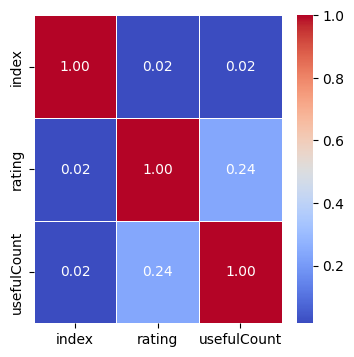

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

###Rating Distribution

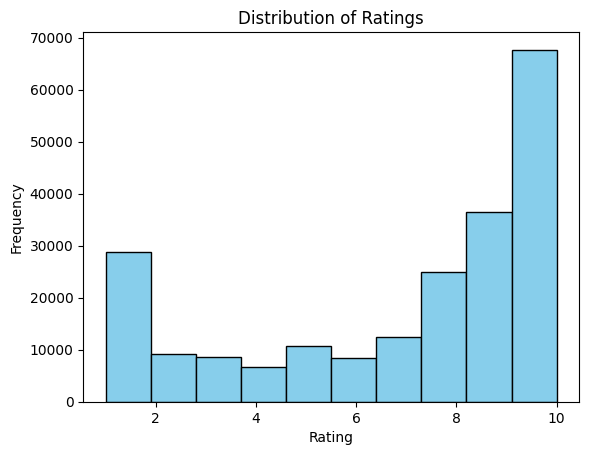

In [24]:
ratings = df['rating']

plt.hist(ratings, bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

plt.show()

###UsefulCount Distribution

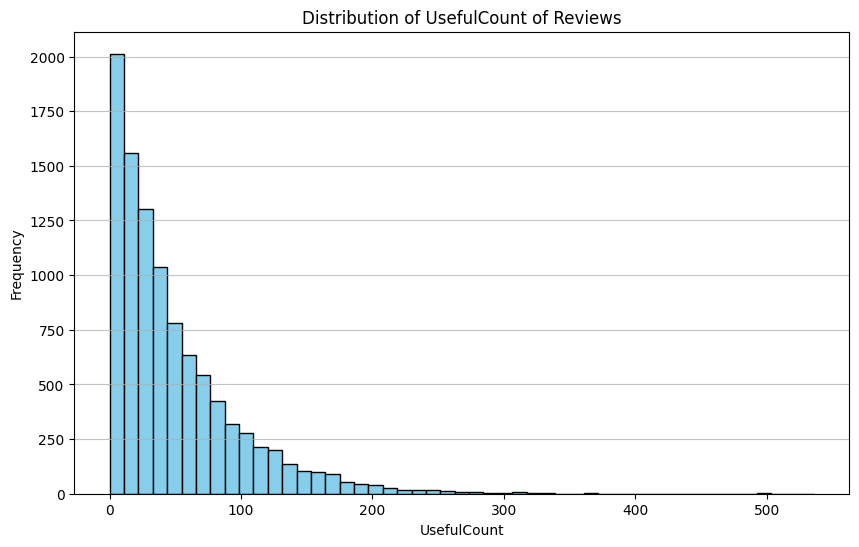

In [37]:
import numpy as np

np.random.seed(0)
data = np.random.exponential(scale=50, size=10000)

plt.figure(figsize=(10, 6))

bins = np.linspace(0, max(data), 50)
plt.hist(data, bins=bins, color='skyblue',edgecolor="black")

plt.title('Distribution of UsefulCount of Reviews')
plt.xlabel('UsefulCount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

###Time Series of Reviews

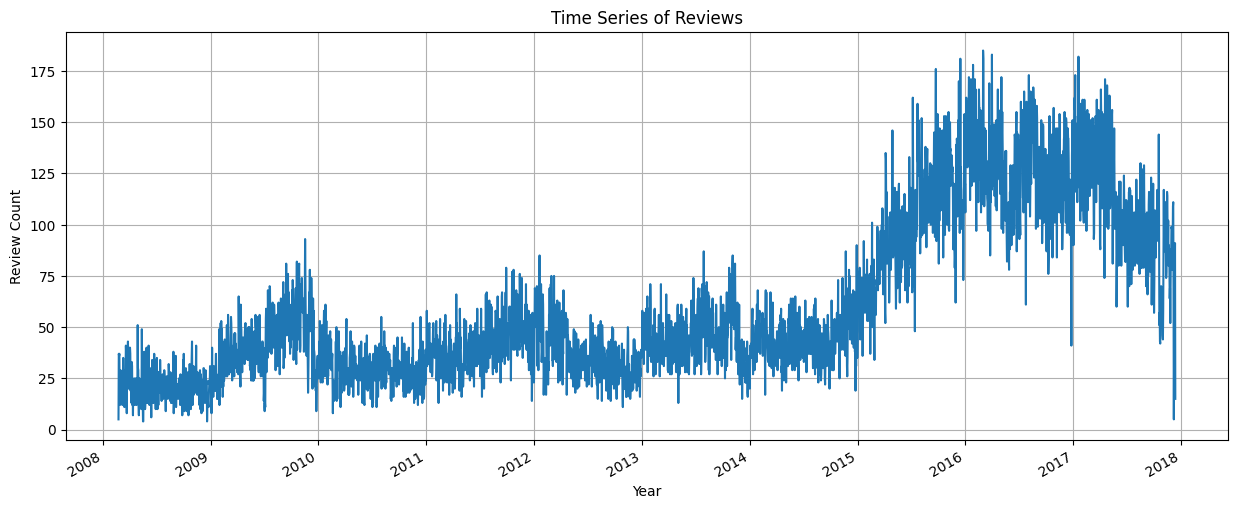

In [70]:
df['date'] = pd.to_datetime(df['date'])

# Group by date and count the number of reviews on each day
review_ts = df.groupby('date').size()

# Plot the time series
plt.figure(figsize=(15, 6))
review_ts.plot()
plt.title('Time Series of Reviews')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()

##Most Common Conditions

In [62]:
conditions = df['condition'].value_counts()

common_conditions = conditions.head(10)

print(common_conditions)

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64


###Best drugs for the conditions

In [66]:
top_conditions = common_conditions.index.tolist()
filtered_df = df[df['condition'].isin(top_conditions)]

avgratings = filtered_df.groupby(['condition', 'drugName'])['rating'].mean().reset_index()

drugs_sorted_best = avgratings.sort_values(by=['condition', 'rating'], ascending=[True, False])

# Output the top 5 sorted drugs for each condition
for condition in top_conditions:
    print(f"Best for '{condition}':")
    best_drugs = drugs_sorted_best[drugs_sorted_best['condition'] == condition]['drugName'].head(5).tolist()
    print(best_drugs)
    print('')

Best for 'Birth Control':
['Elinest', 'Low-Ogestrel-21', 'Plan B', 'Zovia 1 / 50', 'Heather']

Best for 'Depression':
['Asendin', 'Forfivo XL', 'Invega', 'Limbitrol DS', 'Niravam']

Best for 'Pain':
['Anacin', 'Anaprox-DS', 'Aspirin / caffeine', 'Bupivacaine liposome', 'Buprenex']

Best for 'Anxiety':
['Alprazolam Intensol', 'Aspirin / meprobamate', 'Diazepam Intensol', 'Lorazepam Intensol', 'Micrainin']

Best for 'Acne':
['Acnex', 'Avar', 'Avita', 'BenzEFoam Ultra', 'Benzoyl peroxide / hydrocortisone']

Best for 'Bipolar Disorde':
['Eskalith-CR', 'Klonopin Wafer', 'Tiagabine', 'Nuvigil', 'Armodafinil']

Best for 'Insomnia':
['Ethchlorvynol', 'Hetlioz', 'Nembutal Sodium', 'Pentobarbital', 'Remeron SolTab']

Best for 'Weight Loss':
['Megace', 'Suprenza', 'T-Diet', 'Megace ES', 'Phentercot']

Best for 'Obesity':
['Belviq XR', 'Desoxyn', 'Fastin', 'Ionamin', 'Methamphetamine']

Best for 'ADHD':
['Dextrostat', 'ProCentra', 'Selegiline', 'Desoxyn', 'Cylert']



###Worst drugs for the conditions

In [68]:
sorted_drugs_worst = avgratings.sort_values(by=['condition', 'rating'], ascending=[True, True])

# Output the worst 5 sorted drugs for each condition
for condition in top_conditions:
    print(f"Worst 5 drugs for '{condition}':")
    worst_drugs = sorted_drugs_worst[sorted_drugs_worst['condition'] == condition]['drugName'].head(5).tolist()
    print(worst_drugs)
    print('')

Worst 5 drugs for 'Birth Control':
['Dasetta 7 / 7 / 7', 'Larin 24 Fe', 'Philith', 'Pirmella 1 / 35', 'Tri-Lo-Estarylla']

Worst 5 drugs for 'Depression':
['Vyvanse', 'Luvox CR', 'Fetzima', 'Levomilnacipran', 'Pamelor']

Worst 5 drugs for 'Pain':
['Capsin', 'Capzasin', 'Dolobid', 'Prialt', 'Ziconotide']

Worst 5 drugs for 'Anxiety':
['Hyzine', 'Vanspar', 'Compazine', 'Prochlorperazine', 'Trileptal']

Worst 5 drugs for 'Acne':
['Tri-Estarylla', 'Junel Fe 1.5 / 30', 'Loestrin Fe 1 / 20', 'Nortrel 1 / 35', 'Microgestin Fe 1.5 / 30']

Worst 5 drugs for 'Bipolar Disorde':
['Carbatrol', 'Risperdal Consta', 'Celexa', 'Depakene', 'Equetro']

Worst 5 drugs for 'Insomnia':
['ZzzQuil', 'Belsomra', 'Suvorexant', 'Valerian', 'Ramelteon']

Worst 5 drugs for 'Weight Loss':
['Contrave', 'Bupropion / naltrexone', 'Fastin', 'Ionamin', 'Qsymia']

Worst 5 drugs for 'Obesity':
['Methylphenidate', 'Alli', 'Bontril PDM', 'Chorionic gonadotropin (hcg)', 'Contrave']

Worst 5 drugs for 'ADHD':
['Tenex', 'Budepr

##Sampling

In [38]:
import numpy as np
np.random.seed = 42

sample_df = df.sample(n=20000, random_state=42)
sample_df.shape

(20000, 8)

##Tokenization

In [39]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize, WhitespaceTokenizer
from nltk.tokenize.casual import TweetTokenizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
review_len = len(df['review'])
review_len

213869

###Sentence Tokenization

In [41]:
tokenized = [[sent_tokenize(review)] for review in sample_df['review']]
#tokenized

###Word Tokenization

In [42]:
tokenized_word = [word_tokenize(review) for review in sample_df['review']]
#tokenized_word.head()

###Punctuation Tokenization

In [43]:
tokenized_punct = [WhitespaceTokenizer().tokenize(review) for review in sample_df['review']]
#tokenized_punct

##Bag of Words

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer() #tokenizer= lambda x: word_tokenize(x), stop_words='english'

cv.fit(sample_df['review'])

print('number of `tokens`', len(cv.vocabulary_))
cv.vocabulary_

number of `tokens` 25999


{'anxiety': 3794,
 'second': 20705,
 'time': 23484,
 'life': 14181,
 'first': 10457,
 'well': 25327,
 'xanax': 25741,
 'needed': 16084,
 'also': 3432,
 'ambien': 3481,
 'got': 11423,
 'rough': 20268,
 'patch': 17516,
 'need': 16082,
 'anything': 3849,
 'anymore': 3840,
 'almost': 3405,
 'years': 25825,
 'right': 20125,
 'slowly': 21424,
 'coming': 6639,
 'back': 4397,
 'due': 8987,
 'stress': 22311,
 'went': 25351,
 'gave': 11164,
 'buspirone': 5510,
 'took': 23644,
 '5mg': 2168,
 'today': 23583,
 '2pm': 1518,
 '30': 1542,
 'mins': 15430,
 'later': 13922,
 'started': 22056,
 'feeling': 10267,
 'like': 14237,
 'getting': 11258,
 'worse': 25638,
 'every': 9775,
 'minute': 15443,
 'heart': 11932,
 'racing': 19169,
 'sweating': 22745,
 'sudden': 22494,
 'tried': 23924,
 'sit': 21264,
 'drink': 8866,
 'water': 25182,
 'hands': 11762,
 'shaky': 20970,
 'could': 7147,
 'barely': 4515,
 'without': 25534,
 'spilling': 21817,
 'terrified': 23194,
 'er': 9610,
 'rate': 19265,
 '204': 1066,
 'neve

In [48]:
print(cv.get_stop_words())

None


In [49]:
dtm = cv.transform(sample_df['review'])
bow = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
bow

00  000  0002  0003  000vl  001  0025  003045  005  005mg  ...  \
0       0    0     0     0      0    0     0       0    0      0  ...   
1       0    0     0     0      0    0     0       0    0      0  ...   
2       0    0     0     0      0    0     0       0    0      0  ...   
3       0    0     0     0      0    0     0       0    0      0  ...   
4       0    0     0     0      0    0     0       0    0      0  ...   
...    ..  ...   ...   ...    ...  ...   ...     ...  ...    ...  ...   
19995   0    0     0     0      0    0     0       0    0      0  ...   
19996   0    0     0     0      0    0     0       0    0      0  ...   
19997   0    0     0     0      0    0     0       0    0      0  ...   
19998   0    0     0     0      0    0     0       0    0      0  ...   
19999   0    0     0     0      0    0     0       0    0      0  ...   

       zyclara  zyhydro  zylet  zyprexa  zyprexai  zyrtec  zytiga  zyvox  \
0            0        0      0        0         0       0       0      0   
1            0        0      0        0         0       0       0      0   
2            0        0      0        0         0       0       0      0   
3            0        0      0        0         0       0       0      0   
4            0        0      0        0         0       0       0      0   
...        ...      ...    ...      ...       ...     ...     ...    ...   
19995        0        0      0        0         0       0       0      0   
19996        0        0      0        0         0       0       0      0   
19997        0        0      0        0         0       0       0      0   
19998        0        0      0        0         0       0       0      0   
19999        0        0      0        0         0       0       0      0   

       zzzzz  zzzzzzzz  
0          0         0  
1          0         0  
2          0         0  
3          0         0  
4          0         0  
...      ...       ...  
19995      0         0  
19996      0         0  
19997      0         0  
19998      0         0  
19999      0         0  

[20000 rows x 25999 columns]

In [50]:
recognized_tokens_sentence0 = cv.inverse_transform([bow.iloc[0]])
recognized_tokens_sentence0

[array(['204', '2pm', '30', '5mg', 'almost', 'also', 'ambien', 'anxiety',
        'anymore', 'anything', 'back', 'barely', 'buspirone', 'coming',
        'could', 'drink', 'due', 'er', 'every', 'feeling', 'first', 'gave',
        'getting', 'got', 'hands', 'heart', 'horrific', 'later', 'life',
        'like', 'med', 'mins', 'minute', 'need', 'needed', 'never',
        'patch', 'racing', 'rate', 'right', 'rough', 'second', 'shaky',
        'sit', 'slowly', 'spilling', 'started', 'stress', 'sudden',
        'sweating', 'take', 'terrified', 'time', 'today', 'took', 'tried',
        'water', 'well', 'went', 'without', 'worse', 'xanax', 'years'],
       dtype='<U69')]

##Analysis

###TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(norm=None)

tfidf_model.fit(sample_df.review)

tfidf_matrix = tfidf_model.transform(sample_df.review)
tfidf_vectors = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_model.get_feature_names_out())
tfidf_vectors

00  000  0002  0003  000vl  001  0025  003045  005  005mg  ...  \
0      0.0  0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0    0.0  ...   
1      0.0  0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0    0.0  ...   
2      0.0  0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0    0.0  ...   
3      0.0  0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0    0.0  ...   
4      0.0  0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0    0.0  ...   
...    ...  ...   ...   ...    ...  ...   ...     ...  ...    ...  ...   
19995  0.0  0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0    0.0  ...   
19996  0.0  0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0    0.0  ...   
19997  0.0  0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0    0.0  ...   
19998  0.0  0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0    0.0  ...   
19999  0.0  0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0    0.0  ...   

       zyclara  zyhydro  zylet  zyprexa  zyprexai  zyrtec  zytiga  zyvox  \
0          0.0      0.0    0.0      0.0       0.0     0.0     0.0    0.0   
1          0.0      0.0    0.0      0.0       0.0     0.0     0.0    0.0   
2          0.0      0.0    0.0      0.0       0.0     0.0     0.0    0.0   
3          0.0      0.0    0.0      0.0       0.0     0.0     0.0    0.0   
4          0.0      0.0    0.0      0.0       0.0     0.0     0.0    0.0   
...        ...      ...    ...      ...       ...     ...     ...    ...   
19995      0.0      0.0    0.0      0.0       0.0     0.0     0.0    0.0   
19996      0.0      0.0    0.0      0.0       0.0     0.0     0.0    0.0   
19997      0.0      0.0    0.0      0.0       0.0     0.0     0.0    0.0   
19998      0.0      0.0    0.0      0.0       0.0     0.0     0.0    0.0   
19999      0.0      0.0    0.0      0.0       0.0     0.0     0.0    0.0   

       zzzzz  zzzzzzzz  
0        0.0       0.0  
1        0.0       0.0  
2        0.0       0.0  
3        0.0       0.0  
4        0.0       0.0  
...      ...       ...  
19995    0.0       0.0  
19996    0.0       0.0  
19997    0.0       0.0  
19998    0.0       0.0  
19999    0.0       0.0  

[20000 rows x 25999 columns]

In [ ]:
feature_names = tfidf_model.get_feature_names_out()

doc_keywords = [(feature_names[i], tfidf_matrix[0, i]) for i in tfidf_matrix[0].nonzero()[1]]

sorted_keywords = sorted(doc_keywords, key=lambda x: x[1], reverse=True)

#sorted_keywords

In [ ]:
# Extract important words for each document
important_words_per_document = {}

for i in range(len(sample_df)):
    doc_keywords = [(feature_names[j], tfidf_matrix[i, j]) for j in tfidf_matrix[i].nonzero()[0]]
    sorted_keywords = sorted(doc_keywords, key=lambda x: x[1], reverse=True)

    # Store the sorted keywords for the current document
    important_words_per_document[f"Document {i+1}"] = sorted_keywords

# Print the results
for doc, keywords in important_words_per_document.items():
    print(f"{doc}: {keywords}")

Streaming output truncated to the last 5000 lines.
Document 575: [('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0)]
Document 576: [('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Document 8314: [('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0)]
Document 8315: [('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Document 12071: [('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0)]
Document 12072: [('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Document 19427: [('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0)]
Document 19428: [('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0), ('00', 0.0)]
Document 19429: [('00', 0.0), ('00', 0.0),

In [ ]:
important_words_per_document

{'Document 1': [('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.0),
  ('00', 0.